In [3]:
# Chapter 2 - Statistical Learning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. This exercise relates to the College data set, which can be found in the file College.csv . It contains a number of variables for 777 different universities and colleges in the US. The variables are  
• Private : Public/private indicator  
• Apps : Number of applications received  
• Accept : Number of applicants accepted  
• Enroll : Number of new students enrolled  
• Top10perc : New students from top 10% of high school class  
• Top25perc : New students from top 25% of high school class  
• F.Undergrad : Number of full-time undergraduates  
• P.Undergrad : Number of part-time undergraduates  
• Outstate : Out-of-state tuition  
• Room.Board : Room and board costs  
• Books : Estimated book costs  
• Personal : Estimated personal spending  
• PhD : Percent of faculty with Ph.D.’s  
• Terminal : Percent of faculty with terminal degree  
• S.F.Ratio : Student/faculty ratio
• perc.alumni : Percent of alumni who donate
• Expend : Instructional expenditure per student
• Grad.Rate : Graduation rate

In [5]:
college = pd.read_csv('./Datasets/College.csv')
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


## Set first column as table row index

In [6]:
college.set_index('Unnamed: 0', inplace=True)

In [7]:
college = college.rename_axis('College')
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80


## Summary of the data in the College table

In [8]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Pairwise scatter of the first 10 columns in the table:

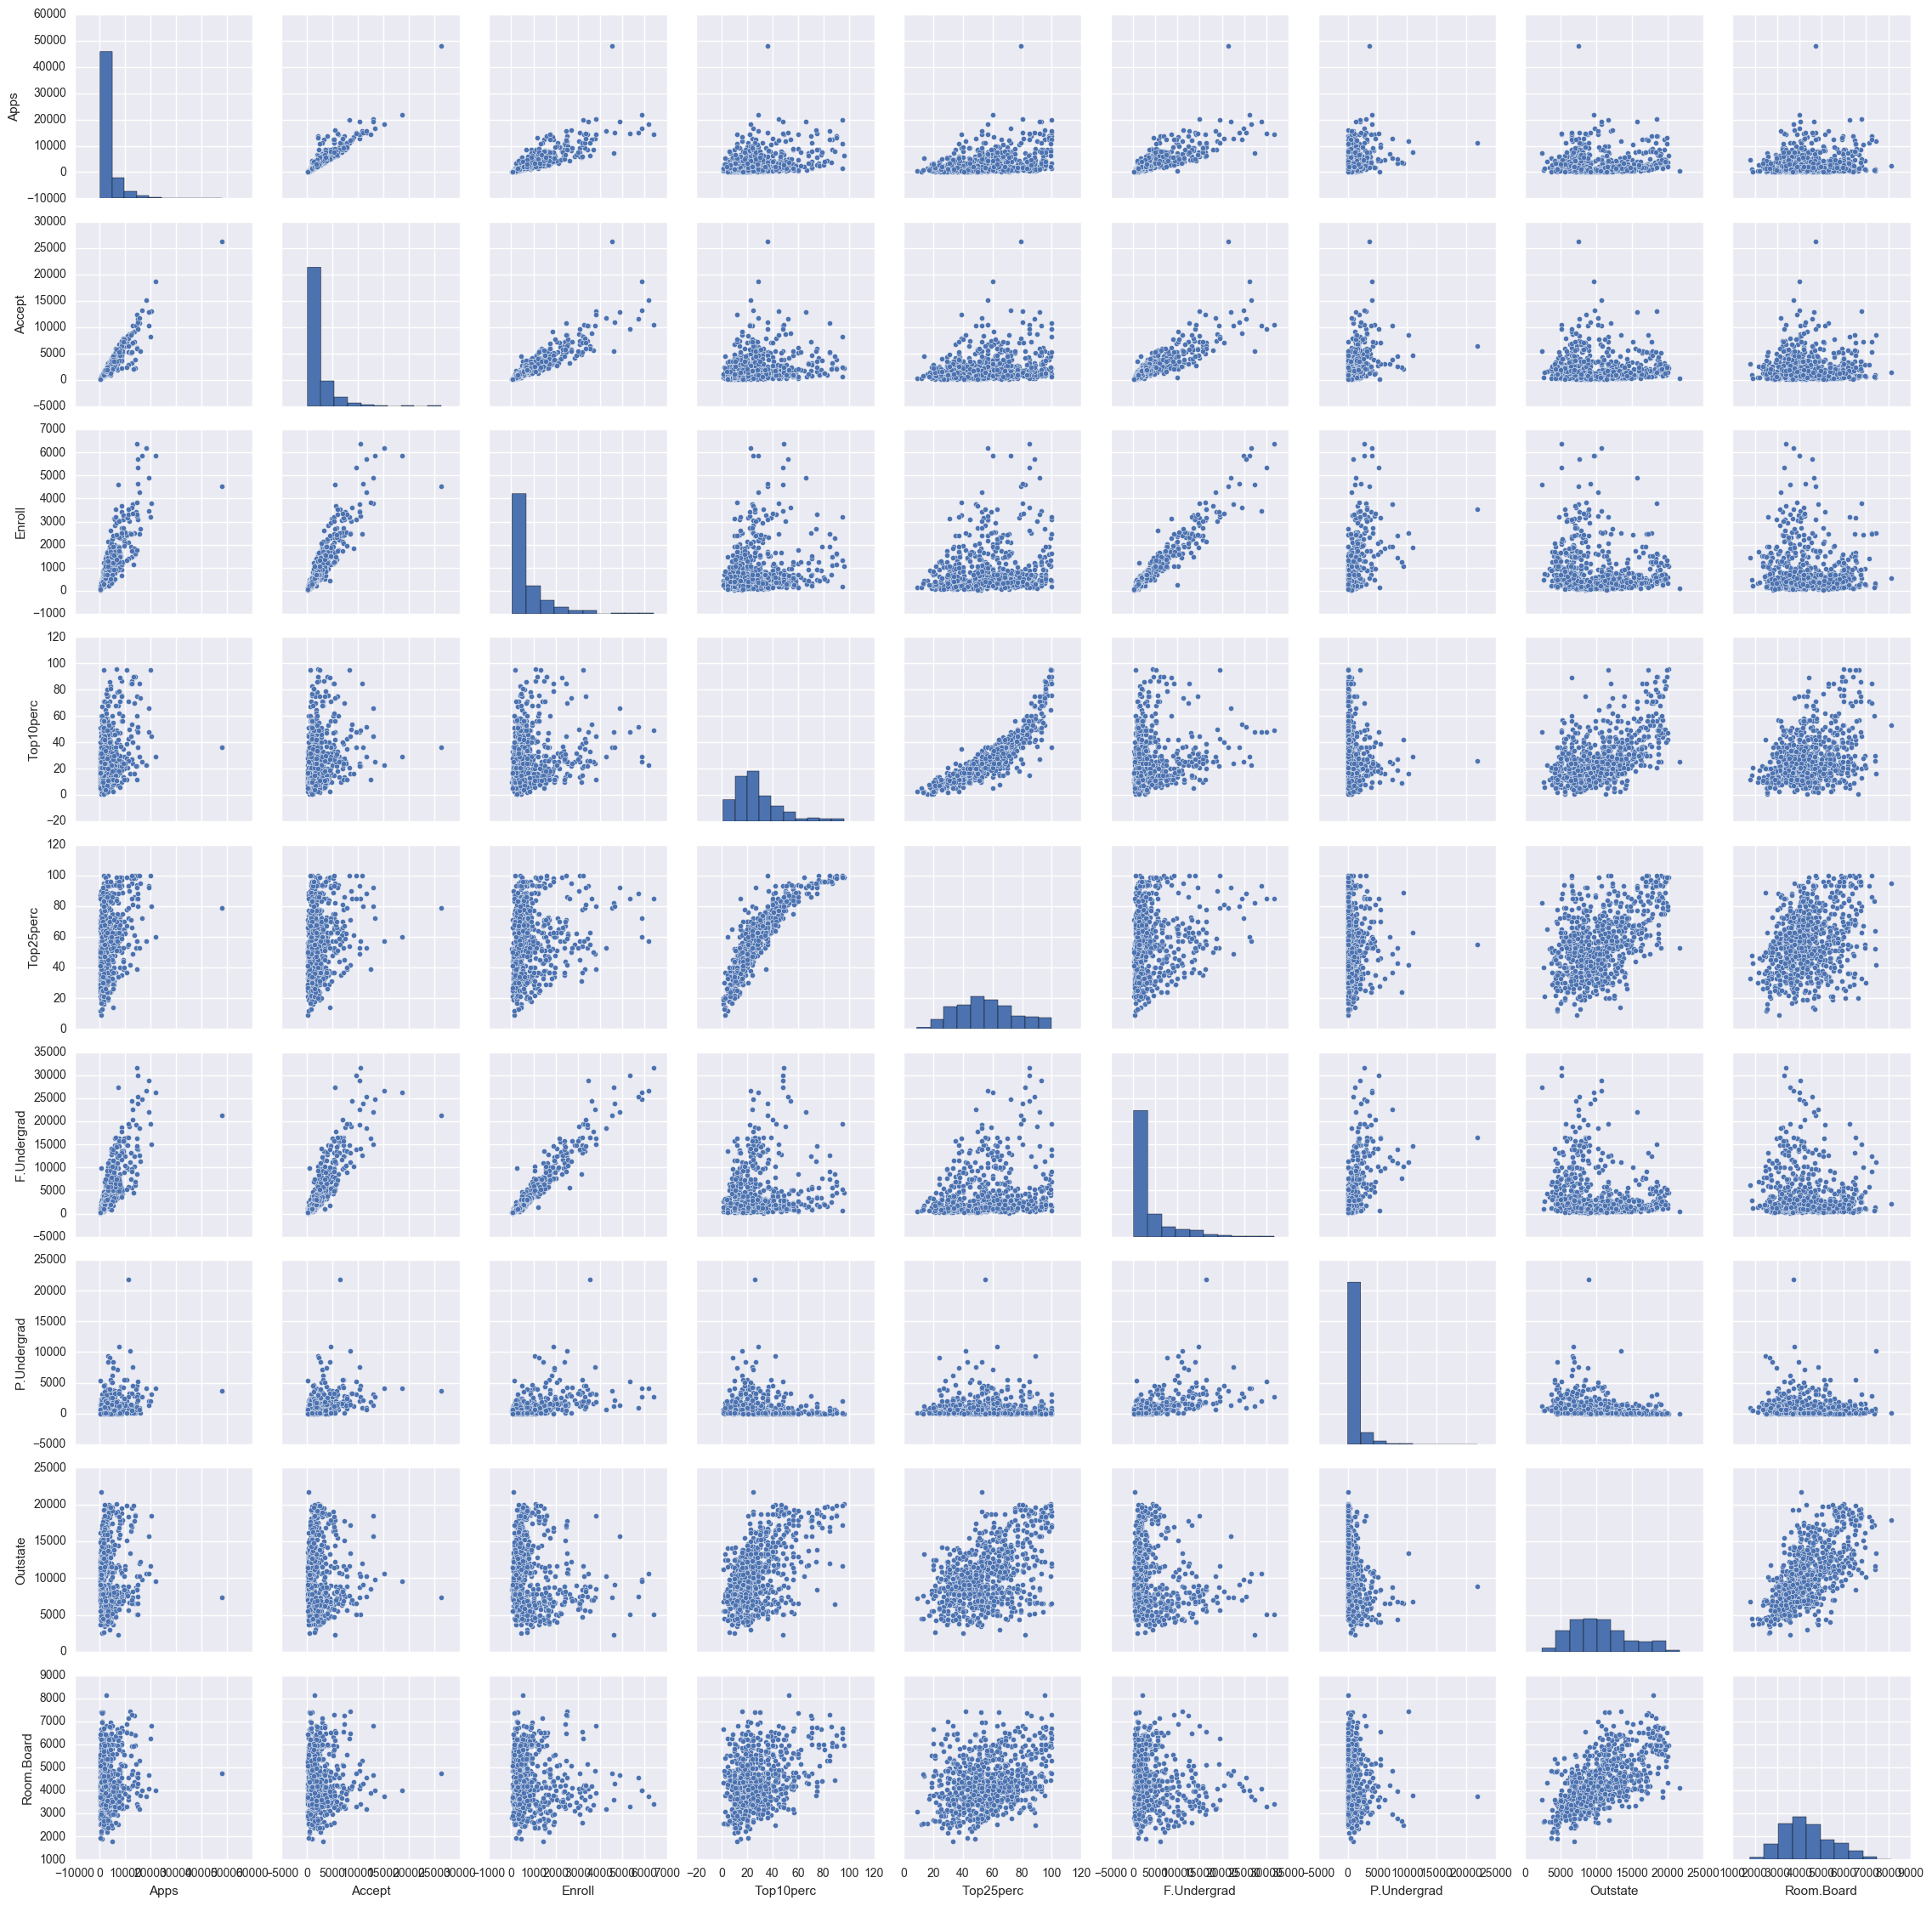

In [9]:
sns.pairplot(college.iloc[:, :10])

## Boxplots of Outstate vs. Private variables

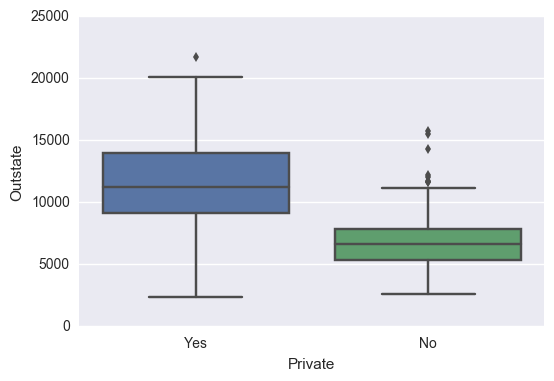

In [10]:
sns.boxplot(x='Private', y='Outstate', data=college)

## Adding Elite variable to the table

In [11]:
college['Elite'] = 'No'
college.loc[college['Top10perc'] > 50, 'Elite'] = 'Yes'
college.describe(include='all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,NaN
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,NaN
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,NaN
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,NaN
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,NaN
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,NaN


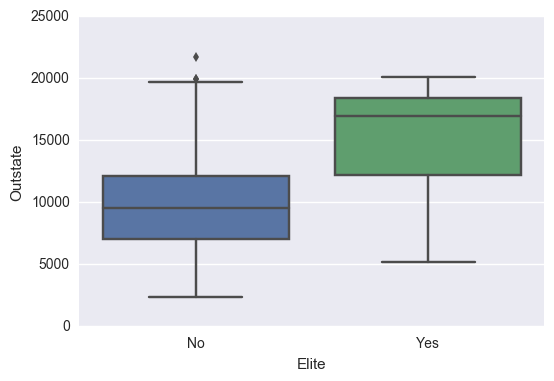

In [12]:
sns.boxplot(x='Elite', y='Outstate', data=college)

## Some histograms for quantitive data in college dataset

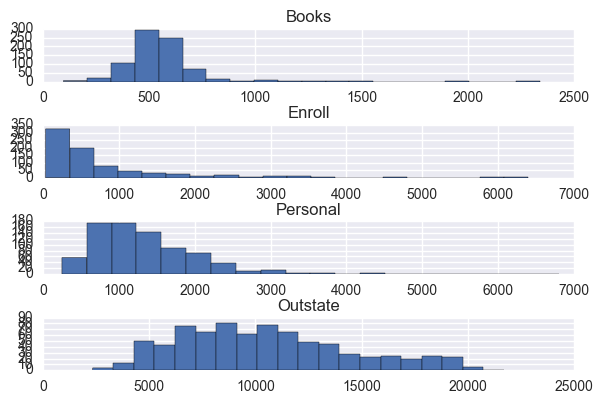

In [15]:
cols = ['Books', 'Enroll', 'Personal', 'Outstate']
bins = 20
fig, axs = plt.subplots(4)
fig.tight_layout()
for idx, ax in enumerate(axs):
    ax.hist(college[cols[idx]], bins=bins)
    ax.set_title(cols[idx])

## Some conclusions from data:  
- on average Books spendings are between \$400 and \$700  
- in most cases personal spendings at most $3000  



## Exploring Auto dataset

In [18]:
auto = pd.read_csv('./Datasets/Auto.csv')
auto.set_index('Unnamed: 0', inplace=True)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
Unnamed: 0,,,,,,,,,
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina


Quantitive predictors are:  
- mpg (miles per gallon)
- cylinders (number of cylinders in engine)  
- displacement (engine displacement in cu.inches) 
- horsepower (power of the engine)  
- weight (lbs.)
- acceleration (0 to 60 mph)  
- year (of manufacturing)  

Qualitative predictors are:
- origin (1. American, 2. European, 3. Japanese)  
- name (of the car model)

## Checking basic descriptive statistics about dataset

In [19]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Now remove 10th to 85th observations from dataset and check descriptive statistics again:

In [34]:
auto_cut = auto.copy()
auto_cut = auto_cut[(auto.index <= 10) | (auto.index > 85)]
auto_cut.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,24.338994,5.389937,188.389937,101.235849,2942.506289,15.695597,77.110063,1.597484
std,7.885977,1.662016,100.424205,36.185088,812.971260,2.719850,3.130771,0.818705
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,102.000000,75.000000,2216.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.500000,2797.500000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,256.000000,115.000000,3523.750000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


### Performing visual analysis of data relationships

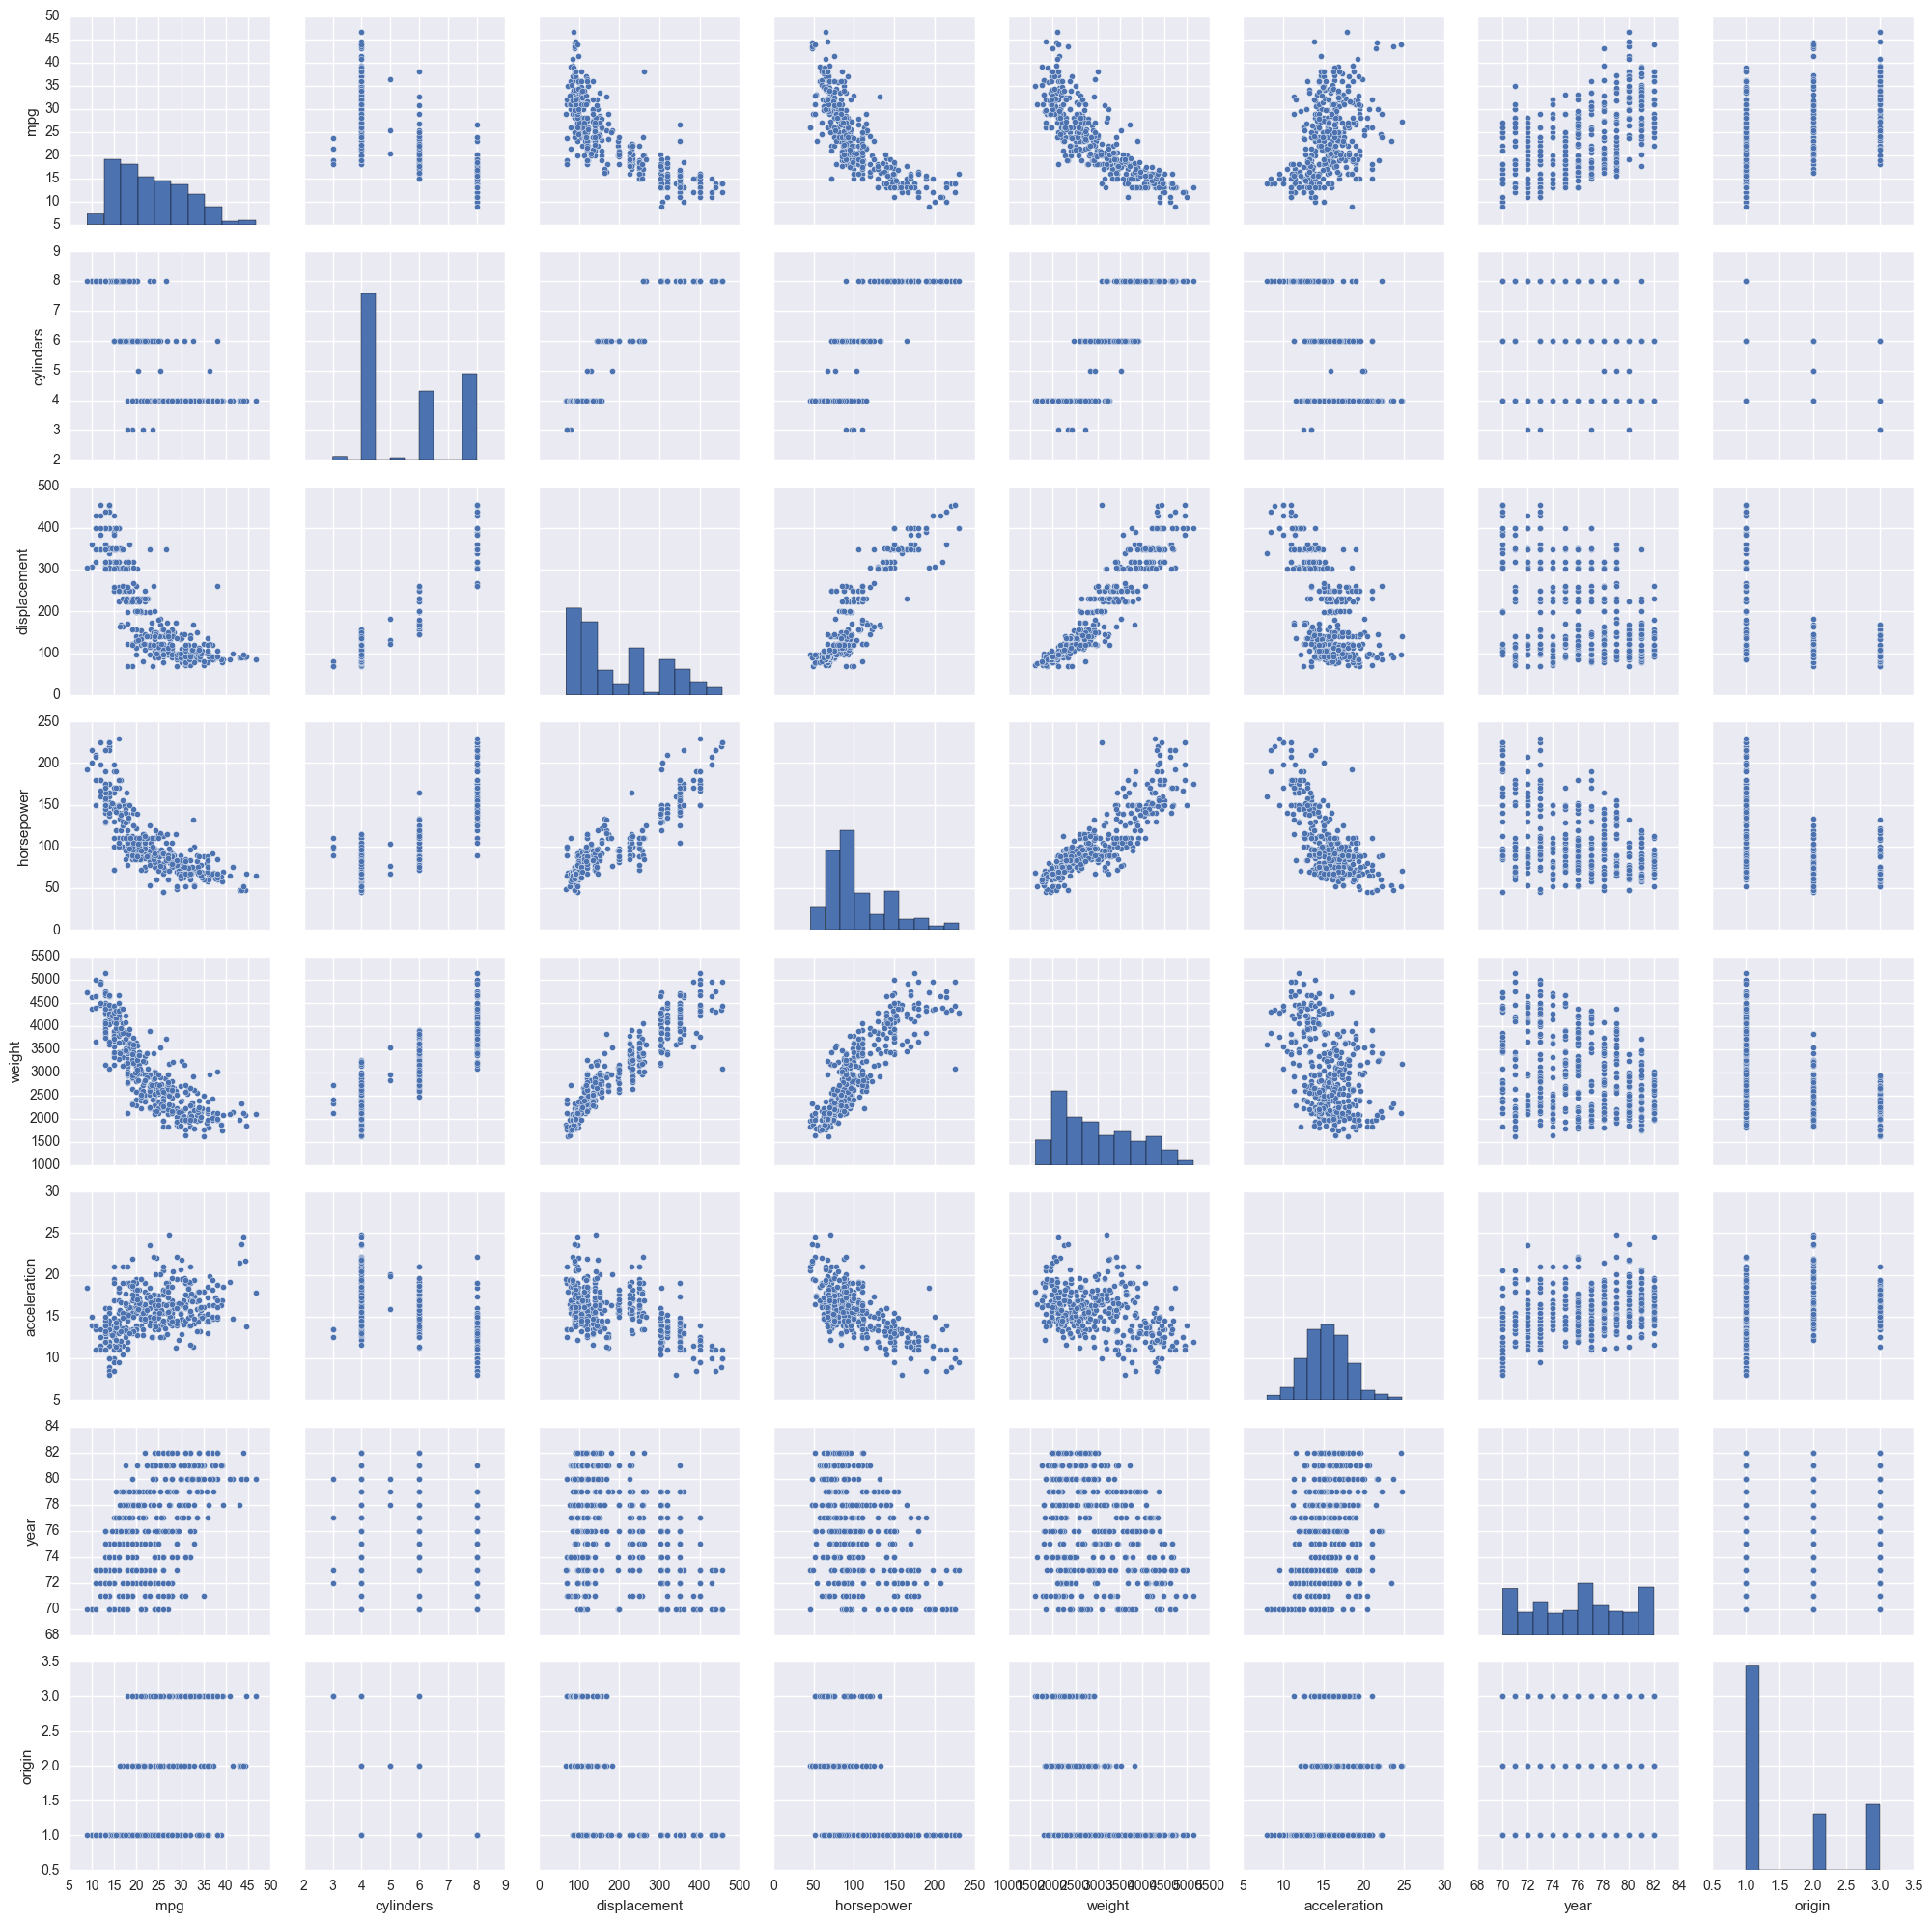

In [35]:
sns.pairplot(auto)

As we can see, there is negative relationship between mpg and weight, horsepower, cylinders and displacement (that should be expected).  
More modern cars can drive more miles per gallon of gas. Also, european and japanese cars have higher mpg on average.

We could predict mpg based on year, acceleration and horsepower. We will have no advantages and better predictive power if we choose  weight and displacement variables too, because they are highly correlated with horsepower.

## Exploring Boston dataset

In [36]:
boston = pd.read_csv('./Datasets/Boston.csv')
boston.set_index('Unnamed: 0', inplace=True)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [37]:
boston.shape

(506, 14)

This dataset have 506 rows and 14 columns. Columns are:

- crim - per capita crime rate by town.
- zn - proportion of residential land zoned for lots over 25,000 sq.ft.
- indus - proportion of non-retail business acres per town.
- chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox - nitrogen oxides concentration (parts per 10 million).
- rm - average number of rooms per dwelling.
- age - proportion of owner-occupied units built prior to 1940.
- dis - weighted mean of distances to five Boston employment centres.
- rad - index of accessibility to radial highways.
- tax - full-value property-tax rate per \$10,000.
- ptratio - pupil-teacher ratio by town.
- black = $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town.
- lstat - lower status of the population (percent).
- medv - median value of owner-occupied homes in \$1000s


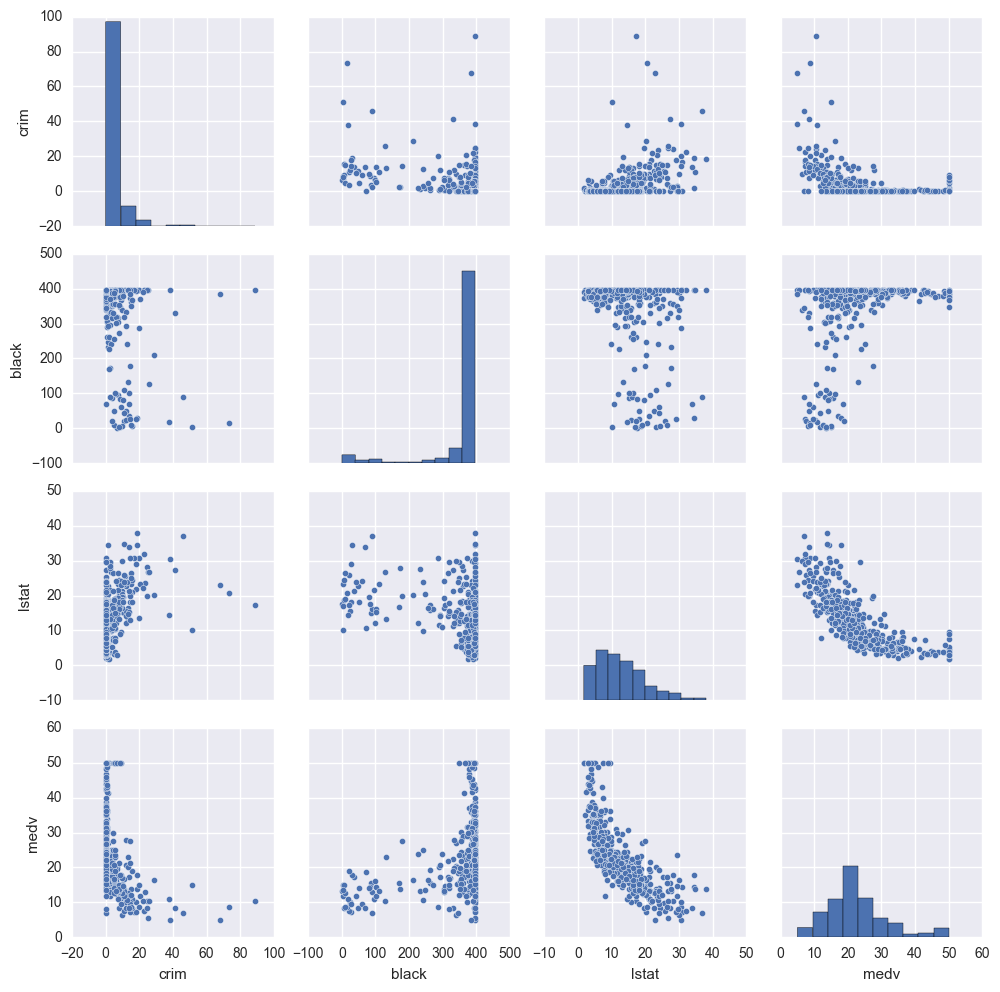

In [41]:
sns.pairplot(boston[['crim', 'black', 'lstat', 'medv']])

Towns with lower median value of house have higher crime rates. Also, more blacks live in such areas. Let's explore crime rate relationship with other variables in more detail:

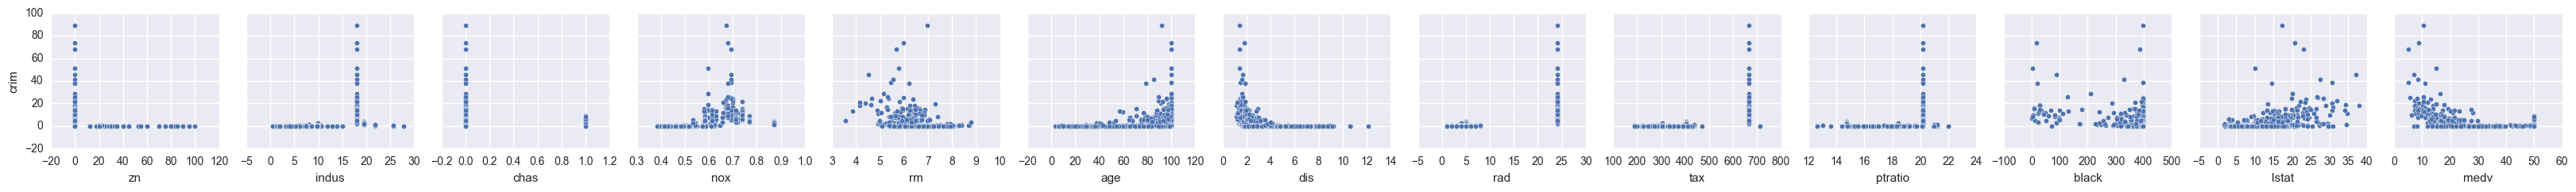

In [44]:
sns.pairplot(boston, y_vars='crim', x_vars=boston.columns[1:])

Suburbs with occupied buildings built before 1940 have highest crimerate among other. Also, closer on average the suburb to employment center, the higher crime rate is. Areas with higher index of accessebility to railways have higher crime rate.

### Exploring descriptive statistics for Boston dataset

In [45]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Some suburbs of bostons have crime rate up to 88%. 50% of suburbs have less than \$330 tax per \$10000 of full-value of property. All suburbs of Boston have pupil-teacher ratio between 12 and 22.

In [47]:
len(boston[boston['chas'] == 1])

35

There are 35 suburbs that bound to Charles river.

 The median value for pupil-teacher ratio is 19.05.

In [62]:
boston.index[boston['medv'].idxmin()]

400

400th suburb have lowes median value of owner-occupied homes in $1000s. Let's check this suburb in more detail:

In [64]:
boston.ix[400,]

crim         9.91655
zn           0.00000
indus       18.10000
chas         0.00000
nox          0.69300
rm           5.85200
age         77.80000
dis          1.50040
rad         24.00000
tax        666.00000
ptratio     20.20000
black      338.16000
lstat       29.97000
medv         6.30000
Name: 400, dtype: float64

This suburb have low crime rate, high nitrogen oxide level, very close to employment centers and have very high tax per \$10000.

In [69]:
len(boston[boston['rm']>7]), len(boston[boston['rm']>8])

(64, 13)

64 suburbs have average more than 7 rooms per dwelling and 13 suburbs have average more than 8 rooms per dwelling. Apparently, those suburbs have only large houses and mansions.